# Code for the 2022 IMI Big Data and Artificial Intelligence Case Competition
In this Git, we conducted several analyses to predict the probability of corporate default from financial data of Canadian medium-sized entities. Any sensitive information (e.g., customer ID info) has been removed or modified as necessary.
The three primary methods to tackle this problem are logisitc regression, support vector machine (SVM), and XGBoost to assess the following specific problems:
1. Binary classification to predict good (investment grade) vs bad (non-investment grade) credit rating
2. Conduct multi-class classification to predict the credit rating of a medium-sized entity ranging from 1 (the best credit and least likely to default on a loan) to 17 (the worst credit and most likely to default on a loan)

# Major highlights of results
1. Cleaned the data by removing missing values and outliers
2. Engineered new features and identified key features using recurssive feature elimination
3. Achieved good performance for both binary and multiclass classification through hyperparameter tuning
4. Discovered data structure using clustering analysis


In [1]:
## Importing necessart packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Reding the data from it's location and overview


In [3]:
data = pd.read_excel('/content/drive/MyDrive/bigdata2022data/cmeg_df_case_competition_scrambled_train.xlsx', sheet_name='Data')

In [5]:
# Overview of the data
data

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
0,5662,1,5,2017Q4,1576,5,1,575863.911214,602838.635998,583646.469630,614602.866245,619611.510181,621095.725446,611355.907673,582433.004400,623105.791017,596800.177680,600460.033208,598408.339905,611355.411490,589592.109008,605336.777910,574789.603998,620745.952718,621004.600446,614991.732391,604478.517167,609095.636450,600147.701765,589971.619360,580405.105567,578103.988392,577109.531117,574090.626783,583030.371565,600890.935743,604975.472270,600103.052065,601804.995337,596259.219747,...,604036.179493,573565.511062,607130.118230,571946.940867,592574.187811,623675.986993,618944.803911,580343.279228,590502.807033,609912.733618,599498.344764,595156.410271,587134.042491,570091.364648,580823.373014,608524.711934,622059.106399,575870.723892,573508.493635,570519.450943,608807.689045,593269.795473,599593.828998,621562.468837,588906.640575,600112.382878,626071.057035,591870.004065,588954.395020,604537.606945,597031.247138,600893.706501,590802.111805,606861.990009,570523.662855,NaN,575350.400174,571025.770698,603242.309649,622846.821734
1,16369,1,5,2015Q4,4545,7,1,599469.364624,615373.028208,612705.047096,NaN,608126.531748,601435.154115,587550.520995,NaN,627335.355343,611300.879046,572542.268654,NaN,604626.757034,586282.226249,624691.726730,NaN,596315.871786,609786.889797,620321.870767,NaN,577715.935070,576662.704616,582062.515093,NaN,616376.771099,604827.131130,599463.087501,NaN,584268.408156,615338.209036,617623.837767,NaN,599915.942888,...,NaN,585261.894944,606387.285367,597933.663213,NaN,584319.594719,582119.776636,604537.048901,NaN,600468.027347,619654.468553,577905.225922,NaN,593683.929674,577347.564682,625997.193308,NaN,599331.009039,594731.372664,579472.873802,NaN,612946.959500,624619.791483,581883.305291,NaN,576159.542727,576880.406059,572899.682067,NaN,603346.339606,621227.589036,594596.565749,NaN,NaN,NaN,NaN,615104.995291,615953.218376,589034.257388,NaN
2,2326,0,12,2015Q2,648,8,1,613829.072017,575020.270272,NaN,NaN,608391.483917,611859.108037,NaN,NaN,585464.960100,571781.269380,NaN,NaN,608591.366569,578175.200440,NaN,NaN,618999.144319,614118.293569,NaN,NaN,578343.317529,575530.917780,NaN,NaN,603655.551037,574183.093293,NaN,NaN,605298.293603,598985.457637,NaN,NaN,577735.145730,...,NaN,572606.634235,592740.514085,NaN,NaN,628443.444334,627082.417223,NaN,NaN,618384.136760,577029.978273,NaN,NaN,587195.266426,580755.669521,NaN,NaN,613853.875298,596322.141176,NaN,NaN,614104.443488,613654.106652,NaN,NaN,605642.248232,601107.708861,NaN,NaN,618703.592690,619380.184641,NaN,NaN,586607.548841,584847.736742,NaN,580199.620976,605016.760749,NaN,NaN
3,38131,0,19,2017Q3,13395,5,1,585059.299344,581915.869330,594033.887481,609965.034011,591791.219692,598332.776102,589877.849288,622230.836194,584513.060799,626767.691011,625743.779183,573802.856646,615999.168162,588623.823558,600443.812695,633589.116171,582358.584899,612497.219818,606794.985460,589340.181176

# Displaying how many empty values are present in each column/feature of the data


In [27]:
pd.set_option('display.max_rows', 500)
print(data.isnull().sum())

ROW                                0
Corp_Residence_Country_Code        0
BR Code                            0
Period                             0
CUSTOMER_ID                        0
Final_IG                           0
B_PLUS_FLAG                        0
EBITDA_Y0                        597
EBITDA_Y1                       2361
EBITDA_Y2                       8434
EBITDA_Y3                      14186
TOTALASSET_Y0                    381
TOTALASSET_Y1                   2210
TOTALASSET_Y2                   8292
TOTALASSET_Y3                  14112
TOTALDEBT_Y0                     875
TOTALDEBT_Y1                    2718
TOTALDEBT_Y2                    8714
TOTALDEBT_Y3                   14358
TOTALREVENUE_Y0                  819
TOTALREVENUE_Y1                 2577
TOTALREVENUE_Y2                 8591
TOTALREVENUE_Y3                14290
CURRENTASSET_Y0                  789
CURRENTASSET_Y1                 2585
CURRENTASSET_Y2                 8571
CURRENTASSET_Y3                14269
F

In [24]:
temp.columns

RangeIndex(start=0, stop=1, step=1)

# Amount of missing data

In [7]:
n_rows = data.shape[0]
n_rows

28224

In [8]:
columns = data.columns
Y0_cols = columns[columns.str.contains('Y0')]
Y1_cols = columns[columns.str.contains('Y1')]
Y2_cols = columns[columns.str.contains('Y2')]
Y3_cols = columns[columns.str.contains('Y3')]

In [11]:
len(Y0_cols)

30

In [10]:
Y1_cols

Index(['EBITDA_Y1', 'TOTALASSET_Y1', 'TOTALDEBT_Y1', 'TOTALREVENUE_Y1',
       'CURRENTASSET_Y1', 'FIXEDASSET_Y1', 'CURRENTLIABILITY_Y1',
       'NONCURRLIA_Y1', 'TOTALEQUITY_Y1', 'TOTALNETWORTH_Y1',
       'CAPITALIZATION_Y1', 'TOTINTEXP_Y1', 'LEASERENTEXP_Y1', 'EBITDAR_Y1',
       'receivabledays_Y1', 'INVENTORYDAYS_Y1', 'payableDAYS_Y1',
       'Capex2Dep_Y1', 'tangibleNetWorth_Y1', 'FIXEDCHARGECOV_Y1',
       'DEBTSERVCOV_Y1', 'NETPROFIT_Y1', 'NETSALES_Y1', 'ASSETTURNOVER_Y1',
       'OPERPROFIT_Y1', 'ARTurnover_Y1', 'Inventory_Y1',
       'RETAINED_EARNINGS_Y1', 'FCF_Y1', 'CCE_Y1'],
      dtype='object')

In [12]:
print(data[Y0_cols].isnull().sum().mean() / n_rows)
print(data[Y1_cols].isnull().sum().mean() / n_rows)
print(data[Y2_cols].isnull().sum().mean() / n_rows)
print(data[Y3_cols].isnull().sum().mean() / n_rows)

0.04406533446712018
0.10686177248677249
0.31639739229024944
0.5100901967930029


In [ ]:
data.shape

(28224, 125)

In [28]:
import matplotlib.ticker as mtick

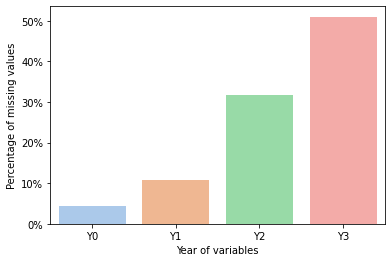

In [32]:
ax = sns.barplot(x=['Y0','Y1','Y2','Y3'], y=np.array([0.04406533446712018,0.10686177248677249,0.31639739229024944,0.5100901967930029])*100, palette='pastel')
plt.xlabel('Year of variables')
plt.ylabel('Percentage of missing values')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [ ]:
28224/12128

2.3271767810026387

In [ ]:
len(data['CUSTOMER_ID'].unique())

12128

In [ ]:
data.sort_values(by='ROW').head(20)

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
4297,2,0,0,2017Q2,0,7,1,581103.459059,612122.516467,589483.648432,608043.506296,618117.885391,572286.965806,595663.823989,598484.795140,592374.298793,600851.987142,618666.358999,611257.492821,614286.305135,595753.583080,614927.198029,575765.908584,617389.802084,607058.381425,615131.005283,578189.877171,573912.625835,577034.556512,628731.489350,588695.367929,602663.994287,619670.487732,601342.126701,599501.380908,580702.155435,605172.141867,612374.075572,602846.687782,603082.268873,...,602238.611294,569635.497383,569690.771511,621675.139715,627054.736006,574223.726878,589579.874664,623133.122345,627140.627628,596661.571732,574520.311390,614847.629204,593966.052639,622541.351417,593577.298515,610679.560390,613220.698155,615628.989908,584080.973259,574790.814329,595747.313056,583814.002802,602846.551695,613914.460251,624184.466138,601705.181254,588731.526063,577631.899885,591900.671899,624579.891601,572312.422496,601762.931580,574251.412954,577170.309608,594024.897459,616177.822587,588163.832676,623659.101547,608794.905517,574860.551018
5842,3,0,0,2016Q1,0,7,1,608189.368162,581513.615779,609292.149994,NaN,600708.646201,613056.508380,603596.954906,NaN,595587.672601,628588.157487,619450.473188,NaN,611199.838933,625510.197950,622849.034549,NaN,594180.345409,616392.204524,596412.193935,NaN,626879.730826,624496.653667,604416.058071,NaN,617638.220218,620132.077922,576559.497665,NaN,610940.878015,591095.980394,576773.300159,NaN,585387.256708,...,NaN,608572.694769,622332.633302,601103.590296,NaN,577540.664228,578281.622188,590465.814274,NaN,609756.956779,588814.018400,586383.373269,NaN,610730.905815,615935.180671,575600.124512,NaN,583923.459740,578784.685601,579529.806442,NaN,608478.996377,616158.426239,608834.668152,NaN,597987.511617,580982.938821,618959.642813,NaN,595610.293959,608263.608776,605605.164605,NaN,581951.016585,608354.236218,623470.119832,591055.821198,592011.405236,572734.002781,NaN
23884,4,0,0,2015Q4,0,7,1,626775.445009,620338.846422,NaN,NaN,600221.302420,581127.642377,NaN,NaN,576546.049381,616987.910843,NaN,NaN,579222.473716,604845.349820,NaN,NaN,603198.743030,571079.607625,NaN,NaN,571915.618982,608530.373185,NaN,NaN,587380.743135,609131.204590,NaN,NaN,599681.312602,585380.900954,NaN,NaN,598712.790779,...,NaN,587802.909999,583903.844377,NaN,NaN,572907.541225,571843.080707,NaN,NaN,593161.129129,582910.070598,NaN,NaN,615017.718711,610852.004788,NaN,NaN,591576.167908,587761.255888,NaN,NaN,589480.260080,605307.325548,NaN,NaN,616662.106818,595190.820363,NaN,NaN,626169.020293,621396.293950,NaN,NaN,590490.362029,620329.261616,NaN,626221.088742,572241.032110,NaN,NaN
15536,5,0,0,2015Q2,0,7,1,613152.446900,595630.881913,NaN,NaN,609049.750940,587819.768006,NaN,NaN,575206.325777,612014.616255,NaN,NaN,581771.232724,616945.663972,NaN,NaN,589031.052366,610867.795934,NaN,NaN,605539.205194,579407.835857,NaN,NaN,571031.185152,580087.801889,NaN,NaN,5

In [ ]:
data[data['EBITDA_Y0'].isnull()]

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
10,413,0,11,2019Q3,123,7,1,NaN,NaN,NaN,NaN,628294.903627,580110.959424,619115.235551,576653.714137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577907.087731,583991.203436,598322.208031,601756.285669,625538.890112,588559.898920,574607.652727,577419.97623,NaN,NaN,NaN,NaN,627442.258013,587842.755216,573094.991868,582903.944943,589938.940547,...,NaN,NaN,NaN,NaN,NaN,NaN,627379.343142,606556.183440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,906,0,13,2014Q4,269,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,20805,0,21,2015Q3,5747,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,29437,0,12,2019Q1,8935,8,1,NaN,NaN,NaN,NaN,609803.729516,NaN,NaN,NaN,602070.023100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619571.210367,NaN,NaN,NaN,577072.903049,NaN,NaN,NaN,614217.457827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601314.820555,NaN,NaN,593385.981204,NaN,NaN,NaN
298,23358,0,24,2015Q3,6561,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,25958,1,5,2016Q3,7474,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602365.223049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602007.123684,NaN,NaN,NaN,586612.293924,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27969,13548,1,5,2018Q1,3815,11,0,NaN,NaN,NaN,NaN,592004.334786,588934.655556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581354.339993,598837.459423,NaN,NaN,NaN,NaN,NaN,NaN,602138.614188,594451.073469,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
temp = data.groupby('CUSTOMER_ID').count()
temp[temp['ROW']==13]

,ROW,Corp_Residence_Country_Code,BR Code,Period,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,TOTALEQUITY_Y1,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2679,13,13,13,13,13,13,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,...,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,13,12,11,9
2946,13,13,13,13,13,13,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,...,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,5,13,12,9,13,12,9,5
3666,13,13,13,13,13,13,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,...,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,9,13,12,11,13,12,11,9


In [ ]:
np.sort(data['Period'].unique())

array(['2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
       '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
       '2019Q2', '2019Q3', '2019Q4', '2020Q1'], dtype=object)

In [ ]:
id = 2946
data_cus = data[data['CUSTOMER_ID']==id].sort_values(by=['Period'])
data_cus

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,TOTALASSET_Y3,TOTALDEBT_Y0,TOTALDEBT_Y1,TOTALDEBT_Y2,TOTALDEBT_Y3,TOTALREVENUE_Y0,TOTALREVENUE_Y1,TOTALREVENUE_Y2,TOTALREVENUE_Y3,CURRENTASSET_Y0,CURRENTASSET_Y1,CURRENTASSET_Y2,CURRENTASSET_Y3,FIXEDASSET_Y0,FIXEDASSET_Y1,FIXEDASSET_Y2,FIXEDASSET_Y3,CURRENTLIABILITY_Y0,CURRENTLIABILITY_Y1,CURRENTLIABILITY_Y2,CURRENTLIABILITY_Y3,NONCURRLIA_Y0,NONCURRLIA_Y1,NONCURRLIA_Y2,NONCURRLIA_Y3,TOTALEQUITY_Y0,...,FIXEDCHARGECOV_Y3,DEBTSERVCOV_Y0,DEBTSERVCOV_Y1,DEBTSERVCOV_Y2,DEBTSERVCOV_Y3,NETPROFIT_Y0,NETPROFIT_Y1,NETPROFIT_Y2,NETPROFIT_Y3,NETSALES_Y0,NETSALES_Y1,NETSALES_Y2,NETSALES_Y3,ASSETTURNOVER_Y0,ASSETTURNOVER_Y1,ASSETTURNOVER_Y2,ASSETTURNOVER_Y3,OPERPROFIT_Y0,OPERPROFIT_Y1,OPERPROFIT_Y2,OPERPROFIT_Y3,ARTurnover_Y0,ARTurnover_Y1,ARTurnover_Y2,ARTurnover_Y3,Inventory_Y0,Inventory_Y1,Inventory_Y2,Inventory_Y3,RETAINED_EARNINGS_Y0,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
6887,10629,0,6,2014Q4,2946,8,1,610374.616370,NaN,NaN,NaN,572062.160971,NaN,NaN,NaN,627444.506553,NaN,NaN,NaN,599912.175465,NaN,NaN,NaN,629535.734408,NaN,NaN,NaN,602717.204618,NaN,NaN,NaN,575810.972171,NaN,NaN,NaN,592622.971503,NaN,NaN,NaN,573866.160041,...,NaN,610557.639168,NaN,NaN,NaN,595210.279400,NaN,NaN,NaN,623317.856033,NaN,NaN,NaN,576680.541262,NaN,NaN,NaN,621714.383579,NaN,NaN,NaN,601116.291047,NaN,NaN,NaN,573642.337346,NaN,NaN,NaN,590705.764221,NaN,NaN,NaN,606516.347346,NaN,NaN,626883.633336,NaN,NaN,NaN
16672,10628,0,6,2015Q2,2946,8,1,610981.662196,622031.527097,NaN,NaN,619782.682431,575238.574089,NaN,NaN,627881.490175,605559.887044,NaN,NaN,614922.080441,609513.206371,NaN,NaN,589834.958033,603421.077382,NaN,NaN,622103.108822,584801.623259,NaN,NaN,594629.952330,578928.489861,NaN,NaN,590451.817825,617780.466010,NaN,NaN,602984.159228,...,NaN,580682.014087,618806.116418,NaN,NaN,576688.949057,585287.984394,NaN,NaN,574631.855669,621332.204003,NaN,NaN,620985.550277,570816.486125,NaN,NaN,575352.035406,594403.491002,NaN,NaN,625544.208706,606282.637001,NaN,NaN,578343.063368,616437.745124,NaN,NaN,584064.243374,600172.288911,NaN,NaN,576143.900022,606984.715735,NaN,618033.616208,605021.517385,NaN,NaN
23561,10627,0,6,2015Q3,2946,8,1,594530.034555,582043.922315,NaN,NaN,584611.163598,612315.279417,NaN,NaN,620230.193538,621942.889331,NaN,NaN,631108.281699,592885.990127,NaN,NaN,575693.015409,603772.572181,NaN,NaN,581629.939788,587000.030360,NaN,NaN,581895.962145,621336.754884,NaN,NaN,595026.233409,585308.813757,NaN,NaN,610667.302472,...,NaN,604102.756823,605168.394231,NaN,NaN,584122.319227,604726.022248,NaN,NaN,620551.217370,586636.223940,NaN,NaN,606311.550872,614699.289573,NaN,NaN,577282.214856,578200.239627,NaN,NaN,570964.654263,586298.364274,NaN,NaN,575353.369830,584035.872119,NaN,NaN,604295.189729,593144.250294,NaN,NaN,593559.860280,580604.057138,NaN,574078.980794,608034.072614,NaN,NaN
4165,10626,0,6,2015Q4,2946,8,1,582231.361869,626458.333971,NaN,NaN,611877.446225,595882.484737,NaN,NaN,584711.111942,617758.727911,NaN,NaN,618427.999280,623251.136654,NaN,NaN,623111.564171,590629.910000,NaN,NaN,629062.052246,628601.803726,NaN,NaN,591977.856888,625540.886215,NaN,NaN,593018.922902,582597.253561,NaN,NaN,595439.685809,...,NaN,619048.049137,623135.216322,NaN,NaN,581390.204378,582833.077096,NaN,NaN,629522.473953,630345.217911,NaN,NaN,602964.709107,611411.824080,NaN,NaN,622326.793339,627149.499661,NaN,NaN,571691.739577,592137.858126,NaN,NaN,619362.558412,616538.233859,NaN,NaN,575142.833741,601121.412526,NaN,NaN,593461.564674,595870.171368,NaN,600900.367837,576885.950247,NaN,NaN
14663,10625,0,6,2016Q1,2946,8,1,577523.910207,605158.412650,593033.109024,NaN,623765.023788,627118.476247,575781.835837,NaN,621674.565013,616476.168787,600515.294068,NaN,604248.190489,584196.431272,584464.306565,NaN,604707.079638,571771.007204,627516.214795,NaN,623343.828669,609

In [ ]:
columns = ['CUSTOMER_ID', 'Corp_Residence_Country_Code','BR Code', 'Final_IG', 'B_PLUS_FLAG'] + list(Y0_cols)
data_short = data[columns]
data_short.head()

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0
0,1576,1,5,5,1,575863.911214,619611.510181,623105.791017,611355.411490,620745.952718,609095.636450,578103.988392,600890.935743,596259.219747,578045.252633,571736.508285,611986.404942,603141.577521,585871.251511,604601.169985,590472.808115,582917.058057,603769.043190,590316.935078,579949.325730,573565.511062,623675.986993,609912.733618,570091.364648,575870.723892,593269.795473,600112.382878,604537.606945,606861.990009,575350.400174
1,4545,1,5,7,1,599469.364624,608126.531748,627335.355343,604626.757034,596315.871786,577715.935070,616376.771099,584268.408156,599915.942888,575278.320599,586176.759045,599885.309188,612396.980939,608239.368101,576727.633238,623527.400755,625385.094320,599583.772148,584262.286957,622519.607329,585261.894944,584319.594719,600468.027347,593683.929674,599331.009039,612946.959500,576159.542727,603346.339606,NaN,615104.995291
2,648,0,12,8,1,613829.072017,608391.483917,585464.960100,608591.366569,618999.144319,578343.317529,603655.551037,605298.293603,577735.145730,585900.805747,585225.732357,603652.451410,610421.314919,615972.913531,614134.979471,583797.304612,623541.230342,599099.056296,592856.378966,599586.156088,572606.634235,628443.444334,618384.136760,587195.266426,613853.875298,614104.443488,605642.248232,618703.592690,586607.548841,580199.620976
3,13395,0,19,5,1,585059.299344,591791.219692,584513.060799,615999.168162,582358.584899,621919.270235,620046.519867,624582.882164,601679.290137,609409.181664,606435.590692,569227.108284,619543.967706,610683.455442,596054.212034,575626.390128,627037.437178,599367.108922,596121.697084,584225.743532,602652.271667,600047.184269,592635.899148,583240.465017,573787.307640,568608.114496,582067.967917,581638.119480,604725.209898,587097.755174
4,12998,0,19,6,1,605966.227164,582546.955793,590177.329836,607879.645878,624481.204725,581316.994347,594651.641147,619814.409081,604318.176057,599764.180894,600254.713521,599030.420526,587964.127888,587331.672092,579706.987774,592648.180887,574529.317966,609647.879264,603957.579631,627957.167678,599551.537646,570361.838213,602279.589211,592417.646739,599057.069965,607542.555339,601244.861338,571756.113932,NaN,NaN


In [ ]:
data_short.shape

(28224, 35)

In [ ]:
data_short.isnull().sum()

CUSTOMER_ID                       0
Corp_Residence_Country_Code       0
BR Code                           0
Final_IG                          0
B_PLUS_FLAG                       0
EBITDA_Y0                       597
TOTALASSET_Y0                   381
TOTALDEBT_Y0                    875
TOTALREVENUE_Y0                 819
CURRENTASSET_Y0                 789
FIXEDASSET_Y0                   477
CURRENTLIABILITY_Y0             536
NONCURRLIA_Y0                   769
TOTALEQUITY_Y0                  962
TOTALNETWORTH_Y0                825
CAPITALIZATION_Y0               716
TOTINTEXP_Y0                    945
LEASERENTEXP_Y0                 824
EBITDAR_Y0                      600
receivabledays_Y0              1097
INVENTORYDAYS_Y0               4978
payableDAYS_Y0                 1899
Capex2Dep_Y0                   3404
tangibleNetWorth_Y0             729
FIXEDCHARGECOV_Y0               787
DEBTSERVCOV_Y0                  791
NETPROFIT_Y0                    559
NETSALES_Y0                 

In [ ]:
data_short = data_short.dropna(axis=0).reset_index(drop=True)
data_short.shape

(16998, 35)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

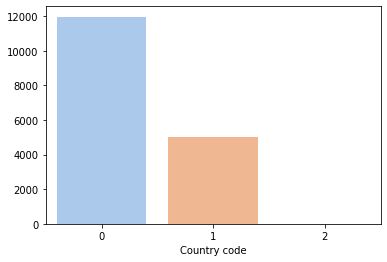

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data_short['Corp_Residence_Country_Code'], palette='pastel')
plt.xlabel('Country code')
plt.ylabel('')

In [ ]:
data_short['Corp_Residence_Country_Code'].value_counts()

0    11975
1     5016
2        7
Name: Corp_Residence_Country_Code, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

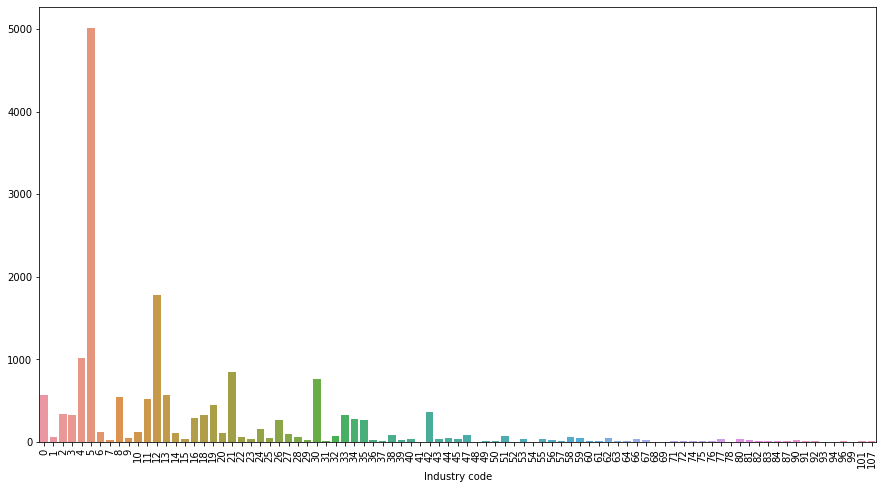

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data_short['BR Code'])
plt.xlabel('Industry code')
plt.xticks(rotation=90)
plt.ylabel('')

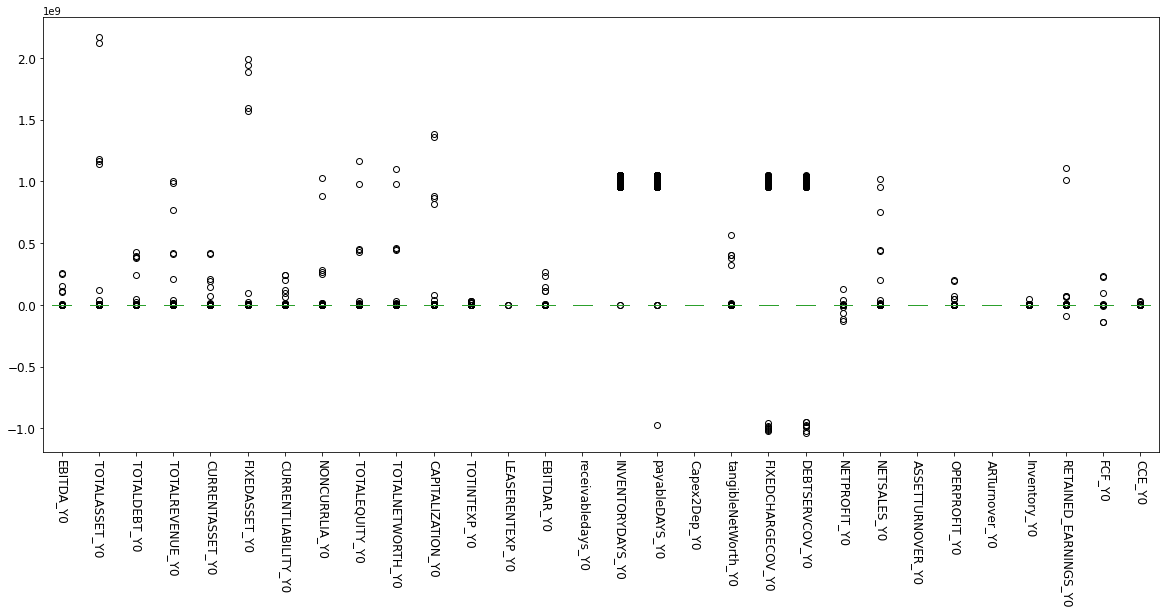

In [ ]:
data_short[Y0_cols].plot(kind='box',figsize=(20,8), rot=-90, fontsize=12)

# Remove outliers

## payableDays_Y0
Remove negative values

In [ ]:
data_short.drop(data_short[data_short['payableDAYS_Y0'] < 0].index, inplace=True)

Remove data > +/- 3SD

In [ ]:
Y0_cols_short = list(Y0_cols)
Y0_cols_short.remove('INVENTORYDAYS_Y0')
Y0_cols_short.remove('payableDAYS_Y0')
Y0_cols_short

['EBITDA_Y0',
 'TOTALASSET_Y0',
 'TOTALDEBT_Y0',
 'TOTALREVENUE_Y0',
 'CURRENTASSET_Y0',
 'FIXEDASSET_Y0',
 'CURRENTLIABILITY_Y0',
 'NONCURRLIA_Y0',
 'TOTALEQUITY_Y0',
 'TOTALNETWORTH_Y0',
 'CAPITALIZATION_Y0',
 'TOTINTEXP_Y0',
 'LEASERENTEXP_Y0',
 'EBITDAR_Y0',
 'receivabledays_Y0',
 'Capex2Dep_Y0',
 'tangibleNetWorth_Y0',
 'FIXEDCHARGECOV_Y0',
 'DEBTSERVCOV_Y0',
 'NETPROFIT_Y0',
 'NETSALES_Y0',
 'ASSETTURNOVER_Y0',
 'OPERPROFIT_Y0',
 'ARTurnover_Y0',
 'Inventory_Y0',
 'RETAINED_EARNINGS_Y0',
 'FCF_Y0',
 'CCE_Y0']

In [ ]:
for col in Y0_cols_short:
  temp_mean = data_short[col].mean()
  temp_std = data_short[col].std()
  low_bound = temp_mean - 3 * temp_std
  high_bound = temp_mean + 3 * temp_std

  data_short = data_short[(data_short[col] > low_bound) & (data_short[col] < high_bound)]

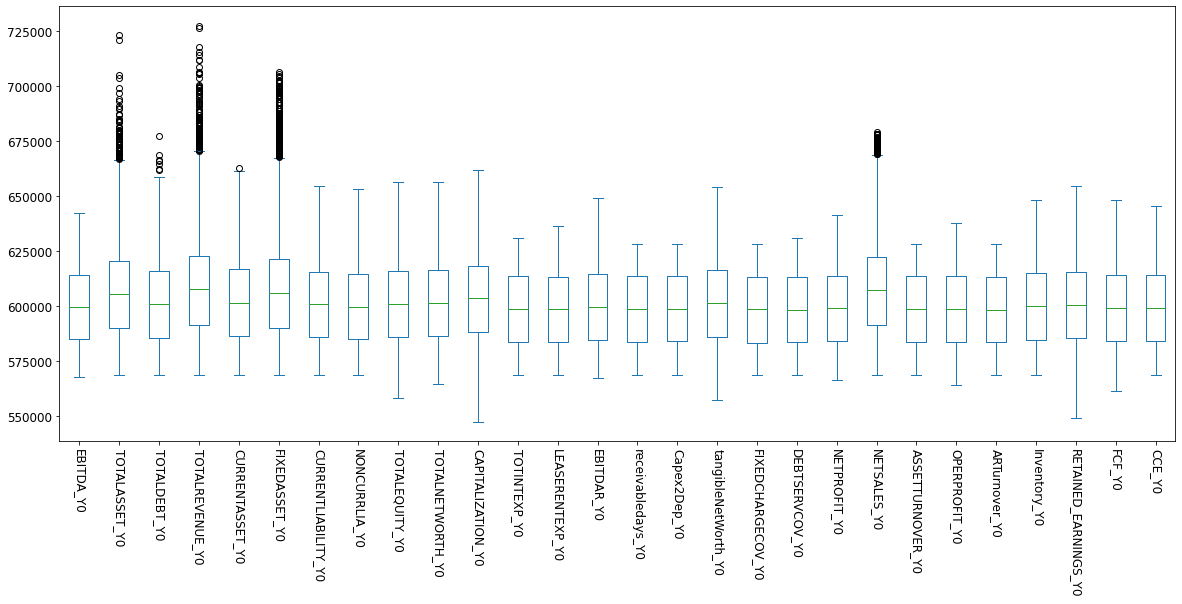

In [ ]:
data_short[Y0_cols_short].plot(kind='box',figsize=(20,8), rot=-90, fontsize=12)

In [ ]:
data_short['Corp_Residence_Country_Code'] = data_short['Corp_Residence_Country_Code'].astype('category')
data_short['BR Code'] = data_short['BR Code'].astype('category')

# Feature engineering

These features are engineered based on formulas and modified formulas from previous research on corporate PD (see Lu & Zhuo, 2021). Importantly, these features do not focus on one aspect of a company's finances (e.g., profitability), but serve to paint a more holistic view in predicting PD.

In [ ]:
data_short['CURRENT_RATIO'] = data_short['CURRENTASSET_Y0'] / data_short['CURRENTLIABILITY_Y0']
data_short['ACID_RATIO'] = (data_short['CURRENTASSET_Y0'] - data_short['Inventory_Y0']) / data_short['CURRENTLIABILITY_Y0']
data_short['CASH_RATIO'] = data_short['CURRENTLIABILITY_Y0'] / data_short['CCE_Y0']
data_short['CASH_RATIO2'] = (data_short['CURRENTLIABILITY_Y0'] + data_short['NONCURRLIA_Y0']) / data_short['CCE_Y0']
data_short['WCL'] = data_short['CURRENTLIABILITY_Y0'] / (data_short['CURRENTLIABILITY_Y0'] + data_short['NONCURRLIA_Y0'])
data_short['LEVERAGE'] = data_short['TOTALASSET_Y0'] / (data_short['CURRENTLIABILITY_Y0'] + data_short['NONCURRLIA_Y0'])
data_short['SR'] = data_short['EBITDA_Y0'] / data_short['TOTALEQUITY_Y0']
data_short['SBTL'] = data_short['TOTALREVENUE_Y0'] / data_short['TOTALEQUITY_Y0']
data_short['FCF'] = data_short['FCF_Y0'] / (data_short['CURRENTLIABILITY_Y0'] + data_short['NONCURRLIA_Y0'])
data_short['OPE'] = data_short['OPERPROFIT_Y0'] / data_short['TOTALREVENUE_Y0']
data_short['ROA'] = data_short['NETSALES_Y0'] / data_short['TOTALASSET_Y0']
data_short['OROA'] = data_short['OPERPROFIT_Y0'] / data_short['TOTALASSET_Y0']
data_short['ROE'] = data_short['NETSALES_Y0'] / data_short['TOTALEQUITY_Y0']
data_short['CAPTIAL_STRUCTURE'] = data_short['TOTALEQUITY_Y0'] / data_short['TOTALASSET_Y0']
data_short['SHORTTERM_LEVERAGE'] = data_short['CURRENTLIABILITY_Y0'] / data_short['TOTALNETWORTH_Y0']
data_short['LIQUIDITY'] = data_short['CCE_Y0'] / data_short['TOTALASSET_Y0']
data_short['DEBT_SERVICE_CAPACITY'] = data_short['NETPROFIT_Y0'] / (data_short['CURRENTLIABILITY_Y0'] + data_short['NONCURRLIA_Y0'])
data_short['EFFICIENCY'] = data_short['NETPROFIT_Y0'] / data_short['TOTALREVENUE_Y0']
data_short['ACID'] = (data_short['CCE_Y0'] + data_short['ARTurnover_Y0']) / data_short['CURRENTLIABILITY_Y0']
data_short['DEBT_COVERAGE'] = data_short['EBITDA_Y0'] / data_short['TOTINTEXP_Y0']
data_short['EBITDA_RATIO'] = data_short['EBITDA_Y0'] / data_short['NETSALES_Y0']

data_short.head()

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
0,1576,1,5,5,1,575863.911214,619611.510181,623105.791017,611355.411490,620745.952718,609095.636450,578103.988392,600890.935743,596259.219747,578045.252633,571736.508285,611986.404942,603141.577521,585871.251511,604601.169985,590472.808115,582917.058057,603769.043190,590316.935078,579949.325730,573565.511062,623675.986993,609912.733618,570091.364648,575870.723892,593269.795473,600112.382878,604537.606945,606861.990009,575350.400174,1.073762,0.035692,1.004786,2.049177,0.490336,0.525542,0.965795,1.025318,0.514728,0.941957,0.984347,0.929406,1.022899,0.962311,1.000102,0.928566,0.528990,1.020153,2.021471,0.940975,0.944174
1,648,0,12,8,1,613829.072017,608391.483917,585464.960100,608591.366569,618999.144319,578343.317529,603655.551037,605298.293603,577735.145730,585900.805747,585225.732357,603652.451410,610421.314919,615972.913531,614134.979471,583797.304612,623541.230342,599099.056296,592856.378966,599586.156088,572606.634235,628443.444334,618384.136760,587195.266426,613853.875298,614104.443488,605642.248232,618703.592690,586607.548841,580199.620976,1.025418,0.022127,1.040427,2.083686,0.499321,0.503238,1.062475,1.053409,0.485219,1.008647,1.016425,1.008978,1.070359,0.949611,1.030303,0.953662,0.519824,1.032620,1.978453,1.016858,0.992634
2,13395,0,19,5,1,585059.299344,591791.219692,584513.060799,615999.168162,582358.584899,621919.270235,620046.519867,624582.882164,601679.290137,609409.181664,606435.590692,569227.108284,619543.967706,610683.455442,596054.212034,575626.390128,627037.437178,599367.108922,596121.697084,584225.743532,602652.271667,600047.184269,592635.899148,583240.465017,573787.307640,568608.114496,582067.967917,581638.119480,604725.209898,587097.755174,0.939218,0.000469,1.056121,2.119970,0.498178,0.475476,0.972377,1.023800,0.485868,0.931474,1.001427,0.969577,0.984970,1.016709,1.017455,0.992069,0.482109,0.974104,1.863902,1.027813,0.987215
3,13610,0,21,6,1,602633.453330,605734.046655,572819.231810,580268.738890,603502.907779,587656.502937,594459.641503,619566.756533,619479.765547,604536.927056,580297.183877,569961.820007,606591.032767,619801.013765,574771.307851,602936.391037,591215.238520,598976.604350,622499.239155,578306.677265,627416.565405,604105.636761,623874.861527,622522.878950,623917.451440,601735.110177,577857.023554,611712.655379,616771.612801,587751.860948,1.015213,0.043142,1.011413,2.065542,0.489660,0.498946,0.972806,0.936703,0.508038,1.075222,1.029948,1.030019,1.007095,1.022693,0.983331,0.970313,0.497605,1.041079,2.000955,1.057322,0.965952
4,11392,1,5,8,1,579642.861183,622028.317955,624452.225874,620551.783461,596700.028726,612349.104167,592262.918727,597934.417421,583194.794576,621499.359273,615342.619863,622286.109025,621920.555494,618913.135595,598519.816311,579104.823409,625597.110237,618945.335399,591480.284064,627623.514077,592446.164542,593610.324087,579650.958137,609655.451918,586550.570176,582009.807305,608450.559913,598009.014189,586892.463429,599979.065552,1.007492,-0.019840,0.987139,1.983731,0.497617,0.522626,0.993910,1.064056,0.493105,0.945208,0.931872,0.942964,0.993923,0.937570,0.952958,0.964553,0.498749,0.956585,1.995716,0.931473,0.999986


In [ ]:
data_short.shape

(15845, 56)

# Initial model selection

Take 10% of the data to try out a few models and select which model to proceed with

In [ ]:
data_init, data_rest = train_test_split(data_short, test_size=0.8, random_state=42)

In [ ]:
data_init

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
16234,13322,1,5,7,1,602767.556955,572803.130112,602057.291412,616819.117023,596558.538303,591456.016235,590167.050404,570825.969679,595141.818851,576191.418143,614104.177266,583689.457324,624047.863668,609811.912192,600413.206976,5.852003e+05,5.702626e+05,588334.922836,614252.621089,570681.744218,593823.649113,608432.949698,599903.442330,593209.175836,583549.452306,572770.059524,597855.869912,610777.220872,588238.119265,598472.859425,1.010830,-0.002198,0.986122,1.939926,0.508330,0.493373,1.012813,1.036424,0.506668,0.946063,1.047312,1.018761,1.008001,1.038999,1.024255,1.044814,0.524063,0.986404,1.984596,1.032685,1.004774
5906,6373,0,30,5,1,586110.806271,626765.261433,593488.232944,611856.941683,624478.692088,632747.363073,603252.894972,605927.184968,591482.188167,628027.479603,573301.823705,625219.069193,606121.541290,588805.126108,579667.546073,1.024594e+09,1.026138e+09,606307.392247,619076.987167,589963.703949,598752.973434,603386.578254,629426.070493,588363.865996,598041.140709,592375.343789,622847.771949,589367.505787,624832.294516,614905.259184,1.035186,0.002704,0.981050,1.966449,0.498894,0.518339,0.990919,1.034447,0.516740,0.977420,1.004245,0.954171,1.064151,0.943706,0.960552,0.981077,0.499005,0.986156,2.001284,0.937449,0.931183
5715,8901,1,5,7,1,600021.428808,619390.390143,598230.038503,683620.107874,623005.380901,638339.272325,621934.560631,615299.367968,597394.540238,634760.494923,651131.363367,579225.781794,584653.652839,602591.925644,595251.977106,6.066299e+05,6.237065e+05,618588.233188,632572.066348,627124.956676,603031.518221,606265.081518,639191.085636,608320.159027,605027.564367,602347.937433,573996.995719,597567.054982,629879.864771,624112.147448,1.001722,0.078800,0.996511,1.982390,0.502681,0.500625,1.004397,1.144336,0.509103,0.885035,1.031968,0.976811,1.069965,0.964488,0.979794,1.007623,0.490017,0.886845,1.972008,1.035902,0.938720
4862,6614,1,5,5,1,622558.534588,646385.258020,623653.878704,631213.103148,631054.180727,657623.043155,594809.699009,618172.166091,611130.579196,632042.594221,593075.081760,572208.691546,609932.011586,605897.005127,602442.492607,9.837303e+08,9.617692e+08,572011.725259,627664.816231,576470.032778,586493.965954,624126.315427,596661.078335,621397.716831,577990.151158,585473.663266,617045.910435,599620.440477,590012.487002,623271.446986,1.060935,0.023551,0.954335,1.946153,0.490370,0.532889,1.018700,1.032861,0.486415,0.915681,0.923073,0.894188,0.976323,0.945459,0.941091,0.964241,0.514539,0.988773,2.032154,1.087992,1.043404
10574,13625,0,12,5,1,619853.654622,613632.747642,625799.545782,601614.663489,600005.518180,582906.409861,606946.267019,606325.321213,590635.764623,572578.496780,600028.625547,599024.541599,616673.588172,611811.946368,570363.993617,5.942173e+05,5.899069e+05,611494.662986,579000.239036,573835.541823,615314.310169,619181.159381,632232.387959,612452.292580,589142.433566,597368.027927,621615.885671,605380.296805,576908.669368,578251.452574,0.988564,-0.035605,1.049623,2.098173,0.500256,0.505767,1.049469,1.018588,0.475498,0.979269,1.030311,0.960090,1.070427,0.962523,1.060023,0.942341,0.510340,1.029199,1.936942,1.034772,0.980421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
cus_ID = data_init['CUSTOMER_ID'].unique()
ID_train, ID_test = train_test_split(cus_ID, test_size=0.2, random_state=42)

In [ ]:
X_train = data_init[data_init['CUSTOMER_ID'].isin(ID_train)].drop(['CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG'], axis=1)
X_test = data_init[data_init['CUSTOMER_ID'].isin(ID_test)].drop(['CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG'], axis=1)
y_train = data_init[data_init['CUSTOMER_ID'].isin(ID_train)][['B_PLUS_FLAG']]
y_test = data_init[data_init['CUSTOMER_ID'].isin(ID_test)][['B_PLUS_FLAG']]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2541, 53), (628, 53), (2541, 1), (628, 1))

In [ ]:
scaler = StandardScaler()
X_train[X_train.columns[2:]] = scaler.fit_transform(X_train[X_train.columns[2:]])
X_test[X_test.columns[2:]] = scaler.transform(X_test[X_test.columns[2:]])
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train

,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,...,BR Code_48,BR Code_49,BR Code_50,BR Code_51,BR Code_52,BR Code_53,BR Code_54,BR Code_55,BR Code_56,BR Code_57,BR Code_58,BR Code_59,BR Code_60,BR Code_62,BR Code_63,BR Code_64,BR Code_66,BR Code_67,BR Code_68,BR Code_69,BR Code_71,BR Code_72,BR Code_74,BR Code_75,BR Code_76,BR Code_77,BR Code_78,BR Code_80,BR Code_81,BR Code_82,BR Code_83,BR Code_87,BR Code_90,BR Code_91,BR Code_92,BR Code_93,BR Code_94,BR Code_96,BR Code_101,BR Code_107
16234,0.178009,-1.692980,0.064050,0.407031,-0.283782,-0.730527,-0.628570,-1.647075,-0.319033,-1.429419,0.532606,-0.878963,1.504265,0.604232,0.096036,-0.438452,-0.438516,-0.615852,0.742391,-1.613825,-0.261339,0.548195,-0.383939,-0.289036,-0.886950,-1.514876,-0.122425,0.535956,-0.596459,-0.026933,0.221087,-0.118142,-0.454249,-0.951441,0.743834,-0.629147,0.333898,0.520689,0.448176,-0.915801,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5906,-0.794544,1.026840,-0.411991,0.175571,1.268126,1.253341,0.114022,0.352587,-0.523997,1.422020,-1.650819,1.534266,0.451923,-0.587633,-1.094771,2.346967,2.347983,0.423399,1.016843,-0.504446,0.029211,0.252872,1.018891,-0.568877,-0.060744,-0.375387,1.284370,-0.657581,1.489655,0.921656,0.801902,-0.000802,-0.578481,-0.574198,-0.167233,0.710648,-0.196230,0.476929,1.016007,-0.203774,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5715,0.017668,0.655129,-0.148567,3.522960,1.186233,1.522008,1.174164,0.886505,-0.192865,1.792395,2.514014,-1.138341,-0.808323,0.194591,-0.200220,-0.438394,-0.438370,1.133534,1.784559,1.633610,0.281402,0.421327,1.482896,0.583699,0.337569,0.204236,-1.465441,-0.200477,1.777400,1.453140,0.003881,1.820806,-0.199753,-0.347470,0.198463,-0.239981,0.130122,2.909489,0.585460,-2.301549,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4862,1.333564,2.015734,1.263813,1.078438,1.633616,2.448509,-0.365110,1.050164,0.576446,1.642887,-0.592708,-1.546094,0.675611,0.382111,0.212518,2.235812,2.173092,-1.559735,1.505392,-1.280798,-0.693374,1.466599,-0.538007,1.338993,-1.203899,-0.776523,0.957783,-0.086006,-0.495308,1.404609,1.415946,0.498244,-1.232901,-0.862867,-0.990333,1.491505,0.476424,0.441828,-0.693595,-1.605659,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10574,1.175632,0.364930,1.383013,-0.302180,-0.092186,-1.141298,0.323612,0.375268,-0.571403,-1.628162,-0.220608,0.012138,1.071367,0.717708,-1.628798,-0.438428,-0.438462,0.723351,-1.263067,-1.432373,1.005389,1.177200,1.152239,0.822350,-0.568081,-0.085204,1.215028,0.235091,-1.242314,-1.194249,-0.309885,-0.917841,1.101298,1.299301,-0.035747,0.035962,1.221424,0.125874,-1.309016,-0.161792,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12083,0.008798,0.307138,-1.246686,-0.474957,0.484778,-1.559897,-0.743009,-1.399225,-0.477504,0.232888,0.285942,0.173383,-1.383399,0.781362,0.585158,-0.438474,-0.438441,1.578398,1.334362,0.458991,-0.646657,-0.444396,0.628837,-1.630727,0.743660,0.543287,-0.481749,-0.519138,-0.181219,-0.806087,0.864374,0.704261,0.018665,-0.258067,0.477972,1.148354,0.332578,-0.076382,0.7

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

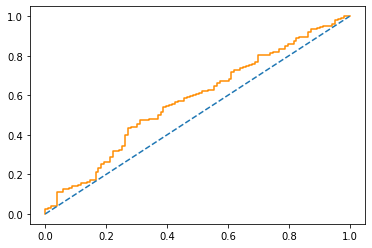

In [ ]:
model = SVC(probability=True, kernel='linear', class_weight='balanced')
model.fit(X_train, np.ravel(y_train))
pred_proba = model.predict_proba(X_test)
prob_default = pred_proba[:,1]
fallout_svm, sensitivity_svm, thresholds_svm = roc_curve(y_test, prob_default)
plt.plot(fallout_svm, sensitivity_svm, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, prob_default)
auc

0.5758853444290337

In [ ]:
model.score(X_test, y_test)

0.5573248407643312

In [ ]:
y_pred = model.predict(X_test)
target_names = ['Default', 'Non-default']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Default       0.20      0.58      0.30       103
 Non-default       0.87      0.55      0.68       525

    accuracy                           0.56       628
   macro avg       0.54      0.57      0.49       628
weighted avg       0.76      0.56      0.61       628



### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, np.ravel(y_train))

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
model.score(X_test, y_test)

0.5700636942675159

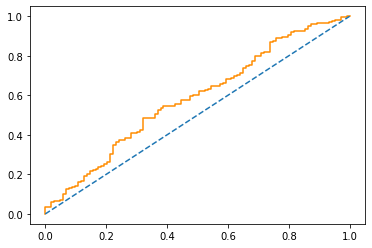

In [ ]:
pred_proba = model.predict_proba(X_test)
prob_default = pred_proba[:,1]
fallout_lg, sensitivity_lg, thresholds_lg = roc_curve(y_test, prob_default)
plt.plot(fallout_lg, sensitivity_lg, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, prob_default)
auc

0.5852981969486823

In [ ]:
y_pred = model.predict(X_test)
target_names = ['Default', 'Non-default']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Default       0.20      0.54      0.29       103
 Non-default       0.87      0.58      0.69       525

    accuracy                           0.57       628
   macro avg       0.53      0.56      0.49       628
weighted avg       0.76      0.57      0.63       628



In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

0.4299363057324841

### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
np.sum(y_train['B_PLUS_FLAG']==0) / np.sum(y_train['B_PLUS_FLAG']==1)

0.17693376563223714

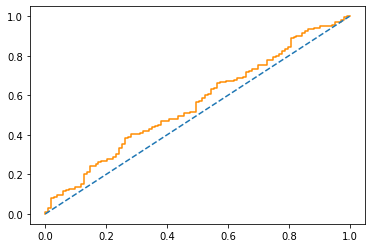

In [ ]:
model = xgb.XGBClassifier(scale_pos_weight=np.sum(y_train['B_PLUS_FLAG']==0)/np.sum(y_train['B_PLUS_FLAG']==1))
model.fit(X_train, np.ravel(y_train))
pred_proba = model.predict_proba(X_test)
prob_default = pred_proba[:,1]
fallout_xgb, sensitivity_xgb, thresholds_xgb = roc_curve(y_test, prob_default)
plt.plot(fallout_xgb, sensitivity_xgb, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, prob_default)
auc

0.557392510402219

In [ ]:
model.score(X_test, y_test)

0.6496815286624203

In [ ]:
y_pred = model.predict(X_test)
target_names = ['Default', 'Non-default']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Default       0.19      0.34      0.24       103
 Non-default       0.85      0.71      0.77       525

    accuracy                           0.65       628
   macro avg       0.52      0.53      0.51       628
weighted avg       0.74      0.65      0.69       628



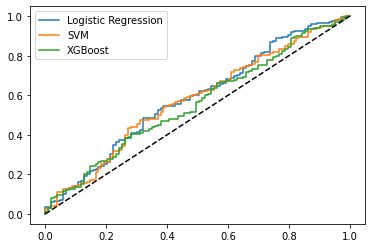

In [ ]:
# Visualizing all 3 methods of analysis so far to compare
plt.plot(fallout_lg, sensitivity_lg, label = 'Logistic Regression')
plt.plot(fallout_svm, sensitivity_svm, label = 'SVM')
plt.plot(fallout_xgb, sensitivity_xgb, label = 'XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'k')
plt.legend()
plt.show()

# Feature selection using recursive feature elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [ ]:
data_rfe, data_rest = train_test_split(data_rest, test_size=0.5, random_state=42)

In [ ]:
data_rfe.head()

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
13506,12999,1,5,7,1,618839.838959,610659.999950,587171.348868,591203.937414,626701.490857,617703.859028,624333.172904,622373.719199,594630.595292,616529.727915,620683.005710,584786.813940,627539.252142,610766.959194,570810.966045,6.177172e+05,5.824357e+05,577943.725197,589494.900624,589469.916876,609839.073623,582286.459732,619409.807526,576216.168085,590529.194483,589003.427586,584347.999825,626993.004481,583918.154279,584743.121920,1.003793,0.067838,1.067705,2.132059,0.500786,0.489818,1.040713,0.994237,0.468368,0.998859,1.014328,0.967034,1.041672,0.973751,1.012657,0.957559,0.467060,0.984916,1.880000,1.058232,0.999080
16244,4069,0,21,7,1,620867.515260,632518.577474,620177.300336,620380.806098,589170.251725,625171.384079,590962.754560,602706.396742,593138.962887,617882.676586,625107.862008,599338.369417,614565.100032,617662.331332,588651.380481,6.029319e+05,6.245150e+05,608130.846465,593376.314932,575352.210294,585000.373422,598414.250093,630964.316028,583977.420939,592547.317357,611855.278578,596905.579219,614860.429964,621110.440466,599035.430633,0.996967,-0.013089,0.986524,1.992652,0.495081,0.529894,1.046749,1.045928,0.520337,0.955135,0.997543,0.936806,1.063771,0.937742,0.956432,0.947064,0.501323,0.964592,2.049014,1.035922,0.983998
13390,6679,0,30,4,1,603287.158785,626997.022379,611969.094801,570361.649121,587237.024923,604566.654224,586223.596293,587964.310216,618843.498616,588818.219410,591534.946094,583478.147430,594698.508877,572211.539171,597091.120693,1.043364e+09,1.031573e+09,573343.069452,615486.771022,600166.805092,607295.065623,613063.077083,609350.150813,603911.830014,622090.414232,604679.406217,622320.921308,629541.402663,623346.343158,621213.584726,1.001729,-0.059847,0.943675,1.890152,0.499259,0.533984,0.974862,0.921657,0.530874,1.090695,0.971855,0.992174,0.984660,0.986996,0.995594,0.990776,0.522117,1.074867,2.091170,1.033950,0.990050
576,5470,0,20,6,1,580284.895237,588944.723157,589861.609571,612923.980942,588982.191447,584834.510787,620232.216358,597068.411157,611200.591425,595719.536869,577756.163667,619006.105350,578848.942373,595312.061630,616012.008155,6.256199e+05,6.000017e+05,609441.699784,585291.988372,609173.596611,621686.866056,573326.521067,631253.882504,587437.509009,596880.600422,570592.936935,575864.405225,573302.064288,605329.030385,618869.077308,0.949616,0.021150,1.002203,1.966976,0.509514,0.483812,0.949418,1.002820,0.497272,0.973825,1.071839,1.013475,1.032810,1.037789,1.041148,1.050810,0.470982,0.935396,1.917769,0.937446,0.919258
11672,4849,0,33,17,0,618262.015578,580400.125418,588456.141772,592037.775986,596651.823019,580947.701335,612436.306336,599472.254173,571254.609163,570481.190081,628163.034659,618137.107168,585232.783480,585014.607469,594091.271456,5.713860e+05,5.797859e+05,598424.069119,622644.271289,614025.345990,585403.585580,572378.201698,600796.603669,580285.626454,600949.072717,595962.722989,594822.033168,607257.230913,574731.389458,570594.717857,0.974227,0.002988,1.073330,2.123939,0.505349,0.478914,1.082288,1.036382,0.474237,1.015052,1.035142,1.035405,1.051714,0.984243,1.073543,0.983106,0.472295,0.966793,1.904782,1.000202,1.029070


In [ ]:
data_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6338 entries, 13506 to 757
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CUSTOMER_ID                  6338 non-null   int64   
 1   Corp_Residence_Country_Code  6338 non-null   category
 2   BR Code                      6338 non-null   category
 3   Final_IG                     6338 non-null   int64   
 4   B_PLUS_FLAG                  6338 non-null   int64   
 5   EBITDA_Y0                    6338 non-null   float64 
 6   TOTALASSET_Y0                6338 non-null   float64 
 7   TOTALDEBT_Y0                 6338 non-null   float64 
 8   TOTALREVENUE_Y0              6338 non-null   float64 
 9   CURRENTASSET_Y0              6338 non-null   float64 
 10  FIXEDASSET_Y0                6338 non-null   float64 
 11  CURRENTLIABILITY_Y0          6338 non-null   float64 
 12  NONCURRLIA_Y0                6338 non-null   float64 
 13  

In [ ]:
cus_ID = data_rfe['CUSTOMER_ID'].unique()
ID_rfe_train, ID_rfe_test = train_test_split(cus_ID, test_size=0.2, random_state=42)

In [ ]:
X_train = data_rfe[data_rfe['CUSTOMER_ID'].isin(ID_rfe_train)].drop(['CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG'], axis=1)
X_rfe_test = data_rfe[data_rfe['CUSTOMER_ID'].isin(ID_rfe_test)]#.drop(['CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG'], axis=1)
y_train = data_rfe[data_rfe['CUSTOMER_ID'].isin(ID_rfe_train)][['B_PLUS_FLAG']]
y_rfe_test = data_rfe[data_rfe['CUSTOMER_ID'].isin(ID_rfe_test)][['B_PLUS_FLAG']]
X_train.shape, X_rfe_test.shape, y_train.shape, y_rfe_test.shape

((5055, 53), (1283, 56), (5055, 1), (1283, 1))

In [ ]:
X_train_num = X_train.drop(labels=['Corp_Residence_Country_Code', 'BR Code'], axis=1)
X_train_num.shape

(5055, 51)

In [ ]:
X_train_num

,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
13506,618839.838959,610659.999950,587171.348868,591203.937414,626701.490857,617703.859028,624333.172904,622373.719199,594630.595292,616529.727915,620683.005710,584786.813940,627539.252142,610766.959194,570810.966045,6.177172e+05,5.824357e+05,577943.725197,589494.900624,589469.916876,609839.073623,582286.459732,619409.807526,576216.168085,590529.194483,589003.427586,584347.999825,626993.004481,583918.154279,584743.121920,1.003793,0.067838,1.067705,2.132059,0.500786,0.489818,1.040713,0.994237,0.468368,0.998859,1.014328,0.967034,1.041672,0.973751,1.012657,0.957559,0.467060,0.984916,1.880000,1.058232,0.999080
16244,620867.515260,632518.577474,620177.300336,620380.806098,589170.251725,625171.384079,590962.754560,602706.396742,593138.962887,617882.676586,625107.862008,599338.369417,614565.100032,617662.331332,588651.380481,6.029319e+05,6.245150e+05,608130.846465,593376.314932,575352.210294,585000.373422,598414.250093,630964.316028,583977.420939,592547.317357,611855.278578,596905.579219,614860.429964,621110.440466,599035.430633,0.996967,-0.013089,0.986524,1.992652,0.495081,0.529894,1.046749,1.045928,0.520337,0.955135,0.997543,0.936806,1.063771,0.937742,0.956432,0.947064,0.501323,0.964592,2.049014,1.035922,0.983998
13390,603287.158785,626997.022379,611969.094801,570361.649121,587237.024923,604566.654224,586223.596293,587964.310216,618843.498616,588818.219410,591534.946094,583478.147430,594698.508877,572211.539171,597091.120693,1.043364e+09,1.031573e+09,573343.069452,615486.771022,600166.805092,607295.065623,613063.077083,609350.150813,603911.830014,622090.414232,604679.406217,622320.921308,629541.402663,623346.343158,621213.584726,1.001729,-0.059847,0.943675,1.890152,0.499259,0.533984,0.974862,0.921657,0.530874,1.090695,0.971855,0.992174,0.984660,0.986996,0.995594,0.990776,0.522117,1.074867,2.091170,1.033950,0.990050
576,580284.895237,588944.723157,589861.609571,612923.980942,588982.191447,584834.510787,620232.216358,597068.411157,611200.591425,595719.536869,577756.163667,619006.105350,578848.942373,595312.061630,616012.008155,6.256199e+05,6.000017e+05,609441.699784,585291.988372,609173.596611,621686.866056,573326.521067,631253.882504,587437.509009,596880.600422,570592.936935,575864.405225,573302.064288,605329.030385,618869.077308,0.949616,0.021150,1.002203,1.966976,0.509514,0.483812,0.949418,1.002820,0.497272,0.973825,1.071839,1.013475,1.032810,1.037789,1.041148,1.050810,0.470982,0.935396,1.917769,0.937446,0.919258
11672,618262.015578,580400.125418,588456.141772,592037.775986,596651.823019,580947.701335,612436.306336,599472.254173,571254.609163,570481.190081,628163.034659,618137.107168,585232.783480,585014.607469,594091.271456,5.713860e+05,5.797859e+05,598424.069119,622644.271289,614025.345990,585403.585580,572378.201698,600796.603669,580285.626454,600949.072717,595962.722989,594822.033168,607257.230913,574731.389458,570594.717857,0.974227,0.002988,1.073330,2.123939,0.505349,0.478914,1.082288,1.036382,0.474237,1.015052,1.035142,1.035405,1.051714,0.984243,1.073543,0.983106,0.472295,0.966793,1.904782,1.000202,1.029070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,626603.601507,593343.860468,604739.484449,628526.128930,586385.019718,598225.4

In [ ]:
scaler = StandardScaler()
X_train_num[X_train_num.columns] = scaler.fit_transform(X_train_num[X_train_num.columns])
X_train_num

,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
13506,1.114620,0.246517,-0.790084,-0.805867,1.381400,0.500809,1.332564,1.291660,-0.377558,0.841971,0.928122,-0.822189,1.680972,0.654273,-1.599391,-0.421701,-0.421798,-1.194989,-0.655098,-0.500075,0.658555,-0.979730,0.554601,-1.292657,-0.472275,-0.556278,-0.877355,1.477799,-0.868128,-0.820317,0.031641,1.549047,1.548629,1.757147,0.042147,-0.782999,1.039478,-0.404131,-1.734419,0.304638,0.226355,-0.522212,0.674260,-0.480256,0.309238,-0.748193,-1.801098,-0.032986,-1.622177,1.387208,0.261994
16244,1.233111,1.351835,1.105219,0.574739,-0.705627,0.851449,-0.560226,0.157462,-0.460816,0.917495,1.165981,0.021330,0.935702,1.053672,-0.569300,-0.421742,-0.421680,0.546355,-0.437873,-1.315330,-0.789263,-0.047250,1.111871,-0.842620,-0.356226,0.772579,-0.162783,0.801960,1.259162,-0.004822,-0.136170,-0.397681,-0.416142,-0.186135,-0.517667,1.329127,1.186943,0.759543,1.196908,-0.695452,-0.156917,-1.227663,1.171016,-1.346752,-1.049376,-0.989860,0.116601,-0.490102,0.760550,0.835349,-0.085964
13390,0.205764,1.072628,0.633879,-1.792093,-0.813130,-0.116054,-0.829034,-0.692701,0.973922,-0.704932,-0.638739,-0.898049,-0.205488,-1.578960,-0.081996,2.493437,2.454796,-1.460377,0.799549,0.117638,0.510267,0.799719,0.069427,0.313279,1.342607,0.355295,1.283443,1.619756,1.387049,1.260626,-0.019112,-1.522455,-1.453190,-1.614950,-0.107702,1.544638,-0.569381,-2.038062,1.791268,2.405188,-0.743452,0.064495,-0.607243,-0.161533,-0.103083,0.016652,1.280375,1.990082,1.354861,0.786579,0.053668
576,-1.138424,-0.851556,-0.635601,0.221893,-0.716085,-1.042584,1.099956,-0.167676,0.547321,-0.319689,-1.379421,1.161422,-1.115930,-0.240916,1.010481,-0.421679,-0.421749,0.621972,-0.890316,0.637753,1.349148,-1.497778,1.125837,-0.641986,-0.107047,-1.626865,-1.360103,-1.513026,0.356512,1.126852,-1.300158,0.425951,-0.036680,-0.544048,0.898656,-1.099553,-1.191030,-0.210924,-0.104119,-0.267958,1.539503,0.561592,0.475064,1.060724,0.997691,1.398992,-1.581575,-1.146744,-1.089721,-1.600530,-1.579594
11672,1.080853,-1.283629,-0.716308,-0.766411,-0.289594,-1.225090,0.657767,-0.029048,-1.682325,-1.728536,1.330213,1.111049,-0.749225,-0.837372,-0.255205,-0.421830,-0.421805,-0.013580,1.200122,0.917927,-0.765760,-1.552608,-0.343108,-1.056689,0.126904,-0.151588,-0.281345,0.378428,-1.393584,-1.627601,-0.695166,-0.010942,1.684762,1.643960,0.489878,-1.357689,2.055232,0.544628,-1.403422,0.675022,0.701597,1.073385,0.899996,-0.227783,1.780488,-0.159961,-1.508088,-0.440588,-1.272813,-0.048204,0.953911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,1.568312,-0.629105,0.218732,0.960163,-0.860508,-0.413807,0.707505,1.002049,-1.016807,0.525984,-1.272560,-0.232134,0.680943,-1.620146,-0.902670,-0.421715,-0.421825,1.707244,-0.311244,-0.727349,-0.554563,0.486508,0.222520,-0.381827,-1.048523,1.639501,-1.719606,-1.650989,-1.143890,-1.591417,-1.140908,0.577619,1.693075,2.068802,-0.195974,-1.188059,1.864074,1.476155,-1.611023,-1.416693,0.637300,-0.257733,0.868694,-0.260895,0.100076,-0.629172,-0.307040,-0.440909,-0.588632,1.262148,0.813526
13568,0.506945,-0.587828,1.165712,0.797124,0.196497,-0.576308,1.462980,-0.125736,0.737948,0.064760,0.724391,0.798632,-0.239620,-0.811377,0.714673,-0.421674,-0.421808,-0.604929,-0.422605,1.137

In [ ]:
orig_features = X_train_num.columns
estimator = LogisticRegression(max_iter=1000, class_weight='balanced')
n_features = list(range(45))[1:]
rfe_result = list()
for i in n_features:

  selector = RFE(estimator, n_features_to_select=i, step=1, verbose=False)
  selector.fit(X_train_num, np.ravel(y_train))

  rfe_result.append(selector.support_)



In [ ]:
X_rfe_test.head()

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
6824,12810,1,5,4,1,575776.590025,628469.630032,569824.265952,602974.838104,613340.975651,590293.976161,589367.333195,597124.989949,576053.034415,598318.549380,578342.177558,627763.069400,610958.132381,571349.639594,616897.621815,580915.532284,605687.070938,594846.020714,579747.396222,624771.102961,570971.428715,609729.850792,582517.607751,604242.862438,570194.011208,576961.651348,598023.566978,604817.662598,579755.141696,621526.646290,1.040677,0.025990,0.948258,1.908997,0.496731,0.529687,0.999520,1.046735,0.488629,0.945635,0.926883,0.907274,1.011222,0.916596,0.985039,0.988953,0.513893,1.011203,2.033517,0.917188,0.988428
13739,8415,0,4,5,1,597232.030121,629288.525109,583424.463913,578361.013497,605608.899548,578859.964662,587906.058088,598150.799673,599079.181046,608480.562113,628180.601557,614363.748082,590684.151122,600329.965912,584485.032822,609584.915109,577814.599934,588219.327006,592495.459289,570740.248716,569915.541488,586155.721396,573343.301548,627232.907508,598344.273363,586750.861352,582784.932848,574296.231433,579258.636441,591931.764991,1.030112,0.038822,0.993199,2.003705,0.495681,0.530572,0.996917,0.965417,0.488390,1.034552,0.911098,0.950827,0.957041,0.951994,0.966187,0.940637,0.494205,1.013477,2.004883,0.972115,1.041666
518,13058,1,5,6,1,595068.973557,591982.512687,607043.411383,583804.598248,617908.764720,616441.606854,584359.625592,626106.362280,618300.565503,573449.053106,591101.600619,625880.242416,580960.186150,580251.087079,597228.792073,582097.905227,608829.165566,575902.453953,574086.658190,611119.567412,590681.924552,577385.231863,572574.643857,611928.928862,594623.753054,592401.529624,617221.980168,613056.979465,602043.098407,589384.676495,1.057412,0.001175,0.991474,2.053779,0.482756,0.489053,0.962427,0.944208,0.497365,1.018532,0.967215,1.004462,0.926046,1.044457,1.019026,0.995612,0.476994,0.989004,2.022361,0.950771,1.039286
9788,1385,1,5,8,1,572118.653796,572367.543727,607557.939296,602340.384607,616231.531419,586048.337664,580429.339813,574142.259783,614976.031456,626919.636558,607743.904367,608168.115382,580218.607278,588995.329776,618971.468867,624285.627663,581963.809274,581325.924302,594942.921149,595298.143183,606954.440971,612809.877494,618148.732321,601660.002514,582174.434702,604004.694325,599680.996528,571378.525257,588585.567046,582432.960858,1.061682,0.028514,0.996560,1.982325,0.502723,0.495740,0.930310,0.979453,0.509787,0.966521,1.079986,1.017134,1.005159,1.074443,0.925843,1.017586,0.530768,1.017381,2.044069,0.940725,0.925536
3021,4453,0,44,5,1,613885.208366,592749.007430,592511.543630,580989.387637,611705.734449,612389.388896,602530.569119,626851.916790,606179.886945,602661.639542,606440.772401,573397.667656,605178.383981,574075.871253,578499.140594,594592.787318,610703.373888,585967.829261,622788.297423,582763.415355,627386.120248,613778.199867,589308.923966,572570.565440,585694.884402,596713.708307,591629.976991,602946.911710,567830.217382,595431.414572,1.015228,0.033319,1.011923,2.064692,0.490108,0.482152,1.012711,0.958444,0.461882,1.008099,0.994196,0.988099,0.972168,1.022659,0.999783,1.004525,0.499257,1.056436,1.978564,1.070610,1.041704


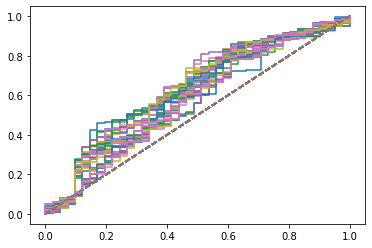

In [ ]:
auc = []
mse = []
for i in range(len(n_features)):
  features = ['CUSTOMER_ID','Corp_Residence_Country_Code', 'BR Code', 'B_PLUS_FLAG'] + list(orig_features[rfe_result[i]])
  X_postRFE = X_rfe_test[features]
  
  cus_ID = X_postRFE['CUSTOMER_ID'].unique()
  ID_train, ID_test = train_test_split(cus_ID, test_size=0.3, random_state=42)

  X_train = X_postRFE[X_postRFE['CUSTOMER_ID'].isin(ID_train)].drop(['CUSTOMER_ID','B_PLUS_FLAG'], axis=1)
  X_test = X_postRFE[X_postRFE['CUSTOMER_ID'].isin(ID_test)].drop(['CUSTOMER_ID', 'B_PLUS_FLAG'], axis=1)
  y_train = X_postRFE[X_postRFE['CUSTOMER_ID'].isin(ID_train)][['B_PLUS_FLAG']]
  y_test = X_postRFE[X_postRFE['CUSTOMER_ID'].isin(ID_test)][['B_PLUS_FLAG']]

  columns = X_train.columns
  columns = columns[2:]

  scaler = StandardScaler()
  X_train[columns] = scaler.fit_transform(X_train[columns])
  X_test[columns] = scaler.transform(X_test[columns])

  X_train = pd.get_dummies(X_train)
  X_test = pd.get_dummies(X_test)

  model = LogisticRegression(max_iter=10000, class_weight='balanced', C=1.0, penalty='l2', solver='newton-cg')
  #model = xgb.XGBClassifier(scale_pos_weight=0.2)
  #model = lgb.LGBMClassifier(scale_pos_weight=0.2)
  model.fit(X_train, np.ravel(y_train))

  pred_proba = model.predict_proba(X_test)
  prob_default = pred_proba[:,1]
  fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
  plt.plot(fallout, sensitivity)#, color = 'darkorange')
  plt.plot([0, 1], [0, 1], linestyle='--')

  y_pred = model.predict(X_test)
  auc.append(roc_auc_score(y_test, prob_default))
  mse.append(mean_squared_error(y_test, y_pred))

plt.show()

# Plotting # features vs the AUC for that many features. From this we can see a plateau occur at ~10-12 features


In [ ]:
sns.lineplot(y=auc, x=n_features)

In [ ]:
auc[11]

0.6278992490197381

# Plotting # features vs the MSE for that many features. From this we can see that 10-12 features has significantly less error compared to 4 features.


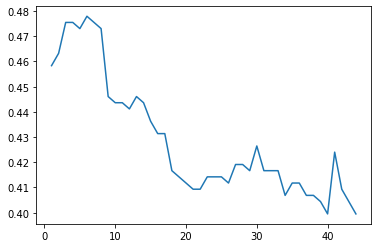

In [ ]:
sns.lineplot(x=n_features, y=mse)

In [ ]:
auc

[0.6114840167475244,
 0.616601315876919,
 0.6376021798365122,
 0.6336146740213996,
 0.6326177975676214,
 0.6288961254735164,
 0.6161361068651557,
 0.6163354821559116,
 0.628032165880242,
 0.6286302917525088,
 0.6289625839037681,
 0.6278992490197381,
 0.6179304844819564,
 0.6175317339004452,
 0.6148733966903701,
 0.6140758955273476,
 0.6152721472718814,
 0.6145411045391108,
 0.6140758955273475,
 0.6148069382601182,
 0.6148069382601182,
 0.6146075629693626,
 0.6147404798298665,
 0.6145411045391108,
 0.603641921977803,
 0.6040406725593143,
 0.6090250548282049,
 0.6096896391307237,
 0.6097560975609755,
 0.6061673423273742,
 0.5772579251678075,
 0.5771914667375557,
 0.5770585498770519,
 0.5755964644115106,
 0.5800491792383864,
 0.5799162623778826,
 0.5815112647039276,
 0.5811789725526681,
 0.5789193859241044,
 0.5789193859241044,
 0.5809131388316607,
 0.5738020867947099,
 0.5748654216787399,
 0.5744666710972286]

In [ ]:
X_train

,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,...,BR Code_48,BR Code_49,BR Code_50,BR Code_51,BR Code_52,BR Code_53,BR Code_54,BR Code_55,BR Code_56,BR Code_57,BR Code_58,BR Code_59,BR Code_60,BR Code_62,BR Code_63,BR Code_64,BR Code_66,BR Code_67,BR Code_68,BR Code_69,BR Code_71,BR Code_72,BR Code_74,BR Code_75,BR Code_76,BR Code_77,BR Code_78,BR Code_80,BR Code_81,BR Code_82,BR Code_83,BR Code_87,BR Code_90,BR Code_91,BR Code_92,BR Code_93,BR Code_94,BR Code_96,BR Code_101,BR Code_107
6824,-1.324140,1.133761,-1.756226,-0.195577,0.651215,-0.775193,-0.614903,-0.113013,-1.350063,-0.159025,-1.665641,1.065152,-0.390815,-0.390748,-1.163610,1.477158,-1.569102,0.600817,-1.188209,0.318050,-1.616544,-1.257501,0.262422,-1.099071,1.315500,0.905677,0.563178,-1.299127,-1.312210,1.320897,0.037492,0.758831,-0.616329,-0.926765,-1.779940,-1.898141,-0.001245,-1.814677,-0.347177,-0.005548,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13739,-0.102497,1.174999,-0.995535,-1.291335,0.209747,-1.321585,-0.697327,-0.053375,-0.092893,0.420810,0.040371,-0.802376,-0.390730,-0.390831,-0.455629,-1.609257,-1.628789,-0.742127,-1.633171,1.645087,-0.012864,-0.684526,-1.422240,-1.127519,-0.395536,0.647451,0.869010,-0.239851,-0.013941,1.369054,-0.025663,-1.007412,-0.629765,1.077315,-2.150938,-0.884719,-1.200439,-0.967356,-0.801136,-1.133770,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9788,-1.532418,-1.691453,0.354306,-0.223821,0.816253,-0.978078,-1.119058,-1.449152,0.775035,1.472927,-0.626876,1.184642,-0.390687,-0.390818,-0.319705,-0.206432,0.464932,0.776276,0.539929,0.168961,-0.934037,0.325363,-1.583286,-0.593117,-0.944712,1.419070,0.623346,-0.160635,-0.307020,-0.526495,-1.641430,-0.702531,0.571972,-0.456022,1.818467,0.658172,-0.135440,1.963682,-1.772605,0.663058,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3021,0.845712,-0.665074,-0.487273,-1.174325,0.557850,0.280671,0.127581,1.615212,0.294788,0.088788,-1.505154,-1.147268,-0.390775,-0.390734,1.226726,-0.922456,1.619887,0.831438,-0.858825,-1.510147,-0.733482,-0.101388,0.159164,-1.782329,-0.193203,0.283670,0.737853,0.201467,0.822066,-1.265976,0.357491,-1.158862,-2.118564,0.481108,-0.197854,-0.017428,-0.865623,0.724131,0.007834,0.358090,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14920,0.038593,0.831295,1.514192,0.958323,-0.061808,1.207620,0.759334,1.848698,1.833814,0.879918,-0.886501,-0.200022,-0.390832,-0.390843,0.353788,1.083002,-0.110404,-1.037811,1.836586,-0.148873,-1.452035,0.206014,-0.277052,1.166391,-0.990283,-0.601361,0.712928,1.220673,1.851539,-0.287506,-1.276222,-0.443674,-0.113318,-1.701708,0.785096,-1.586487,0.117241,0.639566,-0.096134,-1.278836,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,-1.548948,0.068937,0.486428,-0.260306,-1.400342,1.235272,1.404725,-0.185027,-1.578252,-0.153945,-0.396023,-0.102849,-0.390792,-0.390723,1.125962,-1.678771,1.404586,1.437911,1.149118,-0.616351,1.520583,-1.076006,-1.606813,-0.111120,-0.052007,-1.955827,-1.585913,0.996663,0.515611,-0.437503,0.047216,0.869765,-0.600115,1.188128,0.843514,0.946716,2.02746

### Final list of features, reduced from > 140 features to 14 features (feature reduction of ~90%)

In [ ]:
features = ['CUSTOMER_ID','Corp_Residence_Country_Code', 'BR Code', 'B_PLUS_FLAG'] + list(orig_features[rfe_result[11]])

In [ ]:
features

['CUSTOMER_ID',
 'Corp_Residence_Country_Code',
 'BR Code',
 'B_PLUS_FLAG',
 'TOTALASSET_Y0',
 'TOTALREVENUE_Y0',
 'CURRENTLIABILITY_Y0',
 'TOTALEQUITY_Y0',
 'TOTALNETWORTH_Y0',
 'INVENTORYDAYS_Y0',
 'payableDAYS_Y0',
 'OPERPROFIT_Y0',
 'SBTL',
 'OPE',
 'OROA',
 'SHORTTERM_LEVERAGE']

In [ ]:
features = ['CUSTOMER_ID',
 'Corp_Residence_Country_Code',
 'BR Code',
 'B_PLUS_FLAG',
 'TOTALASSET_Y0',
 'TOTALREVENUE_Y0',
 'CURRENTLIABILITY_Y0',
 'TOTALEQUITY_Y0',
 'TOTALNETWORTH_Y0',
 'INVENTORYDAYS_Y0',
 'payableDAYS_Y0',
 'OPERPROFIT_Y0',
 'SBTL',
 'OPE',
 'OROA',
 'SHORTTERM_LEVERAGE']

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
data_rest

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,B_PLUS_FLAG,EBITDA_Y0,TOTALASSET_Y0,TOTALDEBT_Y0,TOTALREVENUE_Y0,CURRENTASSET_Y0,FIXEDASSET_Y0,CURRENTLIABILITY_Y0,NONCURRLIA_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,CAPITALIZATION_Y0,TOTINTEXP_Y0,LEASERENTEXP_Y0,EBITDAR_Y0,receivabledays_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,Capex2Dep_Y0,tangibleNetWorth_Y0,FIXEDCHARGECOV_Y0,DEBTSERVCOV_Y0,NETPROFIT_Y0,NETSALES_Y0,ASSETTURNOVER_Y0,OPERPROFIT_Y0,ARTurnover_Y0,Inventory_Y0,RETAINED_EARNINGS_Y0,FCF_Y0,CCE_Y0,CURRENT_RATIO,ACID_RATIO,CASH_RATIO,CASH_RATIO2,WCL,LEVERAGE,SR,SBTL,FCF,OPE,ROA,OROA,ROE,CAPTIAL_STRUCTURE,SHORTTERM_LEVERAGE,LIQUIDITY,DEBT_SERVICE_CAPACITY,EFFICIENCY,ACID,DEBT_COVERAGE,EBITDA_RATIO
15064,7197,0,12,5,1,584049.283266,581480.519228,579760.653515,598072.539861,631202.637553,617620.219257,588931.143637,586939.385326,622291.098255,589093.172412,589688.943720,592642.247410,593908.557832,589321.799493,592594.608167,6.019521e+05,6.026610e+05,595788.665099,575232.681279,580132.634373,618102.843472,581547.797375,581918.094286,613449.380181,602830.813185,615353.057205,614218.349444,599429.779447,596989.928655,574070.138920,1.071777,0.028839,1.025887,2.048305,0.500847,0.494511,0.938547,0.961082,0.507700,1.007956,1.000753,1.036717,0.935122,1.070184,0.999725,0.987256,0.494568,0.972370,2.019630,0.985501,1.003662
1165,2169,0,2,6,1,585086.697359,623001.989833,615216.768985,591032.019597,602671.213574,597622.175921,629404.268510,594071.199825,627349.916649,602893.916606,624545.642651,573853.085792,621679.205377,606193.615732,575788.400609,1.035435e+09,1.029303e+09,620666.005871,615684.721347,616960.232772,618414.513239,608970.883017,577912.503505,606628.719787,585701.182813,601322.337239,626096.640888,605027.400110,596928.965583,595995.720479,0.957526,-0.037218,1.056055,2.052826,0.514440,0.509207,0.932632,0.942109,0.487896,0.990980,0.927625,0.940127,0.921196,1.006979,1.043972,0.956651,0.497739,1.030352,1.902304,1.019576,1.012414
5212,13211,0,12,6,1,572075.240846,590811.152226,626769.664251,591813.100069,571870.103470,622088.519165,577338.499861,618360.331411,608600.325876,603791.147632,602047.158260,623998.907729,580915.073078,585198.844075,578308.651829,6.231224e+05,5.879037e+05,575917.297253,628511.589031,586941.828106,603385.843622,624524.640624,619877.432318,613568.666909,597301.266040,584117.678813,607645.471482,620481.811848,579650.347092,621500.157788,0.990528,-0.061966,0.928943,1.923891,0.482846,0.494114,0.939985,0.972417,0.484780,1.009273,1.049197,1.010985,1.018530,1.030110,0.956189,1.051944,0.522309,1.055273,2.088234,0.916789,0.922884
13076,13642,0,49,7,1,584288.546366,582602.991331,577695.450678,592999.228539,623671.810840,577215.417814,584671.424858,608165.004919,613583.836873,592663.877103,628351.576779,619707.686144,613526.504563,618348.501069,613928.092168,5.850652e+05,5.766997e+05,601659.560944,586268.423533,571706.929167,601547.147572,597664.597843,592953.391108,606241.374751,610570.020399,606008.957714,611357.445966,627008.086584,581413.481534,590361.759532,1.066705,0.021062,0.990361,2.020518,0.490152,0.488418,0.952255,0.966452,0.487421,1.029630,1.017766,1.048004,0.966377,1.053177,0.986514,1.013317,0.501045,1.007867,2.046227,0.942845,0.985387
15344,1929,0,0,8,1,598068.016018,572554.806166,578025.964947,594390.977992,573773.998111,576707.764476,616206.363499,616723.838948,594588.031273,590050.901191,610097.033760,603012.375167,593276.168072,571281.959740,586606.828204,9.526740e+08,9.909234e+08,573297.701796,613822.180836,628427.164183,609245.892155,613713.913580,591951.699520,590717.802557,602362.629600,615973.143708,617496.814174,625003.525181,607558.197642,579851.430042,0.931139,-0.070955,1.062697,2.126286,0.499790,0.464385,1.005853,0.999669,0.492776,1.013411,1.033878,1.052061,0.995566,1.038482,1.044327,1.012744,0.497769,1.032509,1.940624,0.991801,1.010332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
X = data_rest[features].drop(['CUSTOMER_ID', 'B_PLUS_FLAG'], axis=1)
y = data_rest[['B_PLUS_FLAG']]

In [ ]:
columns = X.columns
scaler = StandardScaler()
X[columns[2:]] = scaler.fit_transform(X[columns[2:]])
X = pd.get_dummies(X)
X

,TOTALASSET_Y0,TOTALREVENUE_Y0,CURRENTLIABILITY_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,OPERPROFIT_Y0,SBTL,OPE,OROA,SHORTTERM_LEVERAGE,Corp_Residence_Country_Code_0,Corp_Residence_Country_Code_1,BR Code_0,BR Code_1,BR Code_2,BR Code_3,BR Code_4,BR Code_5,BR Code_6,BR Code_7,BR Code_8,BR Code_9,BR Code_10,BR Code_11,BR Code_12,BR Code_13,BR Code_14,BR Code_15,BR Code_16,BR Code_18,BR Code_19,BR Code_20,BR Code_21,BR Code_22,BR Code_23,BR Code_24,BR Code_25,BR Code_26,...,BR Code_48,BR Code_49,BR Code_50,BR Code_51,BR Code_52,BR Code_53,BR Code_54,BR Code_55,BR Code_56,BR Code_57,BR Code_58,BR Code_59,BR Code_60,BR Code_62,BR Code_63,BR Code_64,BR Code_66,BR Code_67,BR Code_68,BR Code_69,BR Code_71,BR Code_72,BR Code_74,BR Code_75,BR Code_76,BR Code_77,BR Code_78,BR Code_80,BR Code_81,BR Code_82,BR Code_83,BR Code_87,BR Code_90,BR Code_91,BR Code_92,BR Code_93,BR Code_94,BR Code_96,BR Code_101,BR Code_107
15064,-1.221781,-0.481644,-0.675530,1.206254,-0.704857,-0.439775,-0.439766,0.235864,-1.159346,0.512906,1.100794,0.005765,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1165,0.857416,-0.810716,1.619715,1.490927,0.069063,2.362834,2.352091,-0.744955,-1.580262,0.128767,-1.137997,1.083693,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5212,-0.754548,-0.774209,-1.332953,0.435838,0.119378,-0.439718,-0.439806,-0.080750,-0.907873,0.542719,0.504368,-1.054842,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13076,-1.165573,-0.718770,-0.917101,0.716273,-0.504618,-0.439821,-0.439836,0.679000,-1.040206,1.003374,1.362395,-0.316067,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15344,-1.668739,-0.653719,0.871257,-0.352671,-0.651149,2.138695,2.247930,0.209056,-0.303278,0.636357,1.456441,1.092357,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638,-1.328404,0.414911,0.489633,1.275811,-0.993069,-0.439819,-0.439778,0.134725,-0.519113,-0.260664,1.118440,1.077260,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16843,-0.799669,0.721292,0.598300,-0.518437,0.351955,2.183840,2.319458,0.775253,0.910281,-0.086416,1.127556,0.150903,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15826,0.913234,0.410212,-0.024329,0.042396,-1.778244,-0.439816,-0.439777,1.536954,0.277334,0.640869,0.303126,1.314506,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4743,1.329169,-0.902915,-0.075153,0.210443,0.753847,-0.439792,-0.439780,0.121914,-0.865995,0.785453,-0.907735,-0.604879,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model = LogisticRegression(max_iter = 10000, class_weight='balanced')
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
grid_result = grid_search.fit(X, y)

In [ ]:
grid_result.best_score_

0.6373929276665284

In [ ]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

# Final model - binary

Use the parameters and features to run a final model on all of the data

In [ ]:
data_final = data_short[features]
data_final

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,B_PLUS_FLAG,TOTALASSET_Y0,TOTALREVENUE_Y0,CURRENTLIABILITY_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,OPERPROFIT_Y0,SBTL,OPE,OROA,SHORTTERM_LEVERAGE
0,1576,1,5,1,619611.510181,611355.411490,578103.988392,596259.219747,578045.252633,5.904728e+05,5.829171e+05,575870.723892,1.025318,0.941957,0.929406,1.000102
1,648,0,12,1,608391.483917,608591.366569,603655.551037,577735.145730,585900.805747,5.837973e+05,6.235412e+05,613853.875298,1.053409,1.008647,1.008978,1.030303
2,13395,0,19,1,591791.219692,615999.168162,620046.519867,601679.290137,609409.181664,5.756264e+05,6.270374e+05,573787.307640,1.023800,0.931474,0.969577,1.017455
3,13610,0,21,1,605734.046655,580268.738890,594459.641503,619479.765547,604536.927056,6.029364e+05,5.912152e+05,623917.451440,0.936703,1.075222,1.030019,0.983331
4,11392,1,5,1,622028.317955,620551.783461,592262.918727,583194.794576,621499.359273,5.791048e+05,6.255971e+05,586550.570176,1.064056,0.945208,0.942964,0.952958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16993,9483,1,5,1,597402.203485,583882.137797,628568.237529,579529.000652,602542.832781,9.827803e+08,9.620414e+08,609391.425458,1.007512,1.043689,1.020069,1.043193
16994,3969,0,32,1,628492.484307,597562.025539,585213.601861,585022.194173,604997.849904,6.193316e+05,6.015298e+05,578315.986698,1.021435,0.967792,0.920164,0.967299
16995,1190,0,4,0,594550.303034,583051.296070,578930.931594,598561.236938,601354.290649,6.038162e+05,6.180281e+05,563966.077578,0.974088,0.967267,0.948559,0.962712
16996,11429,1,5,1,588957.530051,575155.953282,626738.433905,616227.480258,599080.625400,5.910354e+05,5.782919e+05,583940.329983,0.933350,1.015273,0.991481,1.046167


In [ ]:
X = data_final.drop(['CUSTOMER_ID', 'B_PLUS_FLAG'], axis=1)
y = data_final['B_PLUS_FLAG']

X[X.columns[2:]] = StandardScaler().fit_transform(X[X.columns[2:]])
X = pd.get_dummies(X)
X

,TOTALASSET_Y0,TOTALREVENUE_Y0,CURRENTLIABILITY_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,OPERPROFIT_Y0,SBTL,OPE,OROA,SHORTTERM_LEVERAGE,Corp_Residence_Country_Code_0,Corp_Residence_Country_Code_1,BR Code_0,BR Code_1,BR Code_2,BR Code_3,BR Code_4,BR Code_5,BR Code_6,BR Code_7,BR Code_8,BR Code_9,BR Code_10,BR Code_11,BR Code_12,BR Code_13,BR Code_14,BR Code_15,BR Code_16,BR Code_18,BR Code_19,BR Code_20,BR Code_21,BR Code_22,BR Code_23,BR Code_24,BR Code_25,BR Code_26,...,BR Code_48,BR Code_49,BR Code_50,BR Code_51,BR Code_52,BR Code_53,BR Code_54,BR Code_55,BR Code_56,BR Code_57,BR Code_58,BR Code_59,BR Code_60,BR Code_62,BR Code_63,BR Code_64,BR Code_66,BR Code_67,BR Code_68,BR Code_69,BR Code_71,BR Code_72,BR Code_74,BR Code_75,BR Code_76,BR Code_77,BR Code_78,BR Code_80,BR Code_81,BR Code_82,BR Code_83,BR Code_87,BR Code_90,BR Code_91,BR Code_92,BR Code_93,BR Code_94,BR Code_96,BR Code_101,BR Code_107
0,0.688847,0.147698,-1.292758,-0.269246,-1.316478,-0.431814,-0.431836,-1.315719,0.281463,-0.993018,-1.393289,0.011192,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.125437,0.018535,0.156738,-1.306328,-0.877919,-0.431832,-0.431724,0.863130,0.906803,0.519530,0.456123,0.744457,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.708140,0.364699,1.086569,0.034200,0.434506,-0.431854,-0.431715,-1.435231,0.247663,-1.230780,-0.459635,0.432518,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.008006,-1.304973,-0.364930,1.030771,0.162498,-0.431779,-0.431813,1.440412,-1.691231,2.029465,0.945142,-0.395991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.810206,0.577442,-0.489546,-1.000666,1.109476,-0.431845,-0.431719,-0.703085,1.143817,-0.919289,-1.078168,-1.133400,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16993,-0.426386,-1.136120,1.569991,-1.205898,0.051171,2.265041,2.208614,0.607148,-0.114939,1.314297,0.713888,1.057396,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16994,1.134802,-0.496863,-0.889442,-0.898358,0.188230,-0.431734,-0.431785,-1.175450,0.195013,-0.407069,-1.608099,-0.785230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16995,-0.569594,-1.174945,-1.245847,-0.140366,-0.015182,-0.431777,-0.431740,-1.998612,-0.858995,-0.418993,-0.948138,-0.896591,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16996,-0.850433,-1.543892,1.466190,0.848690,-0.142117,-0.431812,-0.431849,-0.852818,-1.765879,0.669810,0.049455,1.129613,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', C=1.0, penalty='l2', solver='lbfgs')
model.fit(X,y)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='sag')

# Multiclass Classification

Using the parameters determined above to run multicalss classification

In [ ]:
features = ['CUSTOMER_ID',
 'Corp_Residence_Country_Code',
 'BR Code',
 'Final_IG',
 'TOTALASSET_Y0',
 'TOTALREVENUE_Y0',
 'CURRENTLIABILITY_Y0',
 'TOTALEQUITY_Y0',
 'TOTALNETWORTH_Y0',
 'INVENTORYDAYS_Y0',
 'payableDAYS_Y0',
 'OPERPROFIT_Y0',
 'SBTL',
 'OPE',
 'OROA',
 'SHORTTERM_LEVERAGE']

In [ ]:
data_multi = data_short[features]
data_multi

,CUSTOMER_ID,Corp_Residence_Country_Code,BR Code,Final_IG,TOTALASSET_Y0,TOTALREVENUE_Y0,CURRENTLIABILITY_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,OPERPROFIT_Y0,SBTL,OPE,OROA,SHORTTERM_LEVERAGE
0,1576,1,5,5,619611.510181,611355.411490,578103.988392,596259.219747,578045.252633,5.904728e+05,5.829171e+05,575870.723892,1.025318,0.941957,0.929406,1.000102
1,648,0,12,8,608391.483917,608591.366569,603655.551037,577735.145730,585900.805747,5.837973e+05,6.235412e+05,613853.875298,1.053409,1.008647,1.008978,1.030303
2,13395,0,19,5,591791.219692,615999.168162,620046.519867,601679.290137,609409.181664,5.756264e+05,6.270374e+05,573787.307640,1.023800,0.931474,0.969577,1.017455
3,13610,0,21,6,605734.046655,580268.738890,594459.641503,619479.765547,604536.927056,6.029364e+05,5.912152e+05,623917.451440,0.936703,1.075222,1.030019,0.983331
4,11392,1,5,8,622028.317955,620551.783461,592262.918727,583194.794576,621499.359273,5.791048e+05,6.255971e+05,586550.570176,1.064056,0.945208,0.942964,0.952958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16993,9483,1,5,8,597402.203485,583882.137797,628568.237529,579529.000652,602542.832781,9.827803e+08,9.620414e+08,609391.425458,1.007512,1.043689,1.020069,1.043193
16994,3969,0,32,8,628492.484307,597562.025539,585213.601861,585022.194173,604997.849904,6.193316e+05,6.015298e+05,578315.986698,1.021435,0.967792,0.920164,0.967299
16995,1190,0,4,12,594550.303034,583051.296070,578930.931594,598561.236938,601354.290649,6.038162e+05,6.180281e+05,563966.077578,0.974088,0.967267,0.948559,0.962712
16996,11429,1,5,3,588957.530051,575155.953282,626738.433905,616227.480258,599080.625400,5.910354e+05,5.782919e+05,583940.329983,0.933350,1.015273,0.991481,1.046167


## Gridsearch for multiclass

In [ ]:
data_grid, data_rest = train_test_split(data_multi, test_size=0.5, random_state=42)

In [ ]:
X = data_grid.drop(['CUSTOMER_ID', 'Final_IG'], axis=1)
y = data_grid[['Final_IG']]

In [ ]:
columns = X.columns
scaler = StandardScaler()
X[columns[2:]] = scaler.fit_transform(X[columns[2:]])
X = pd.get_dummies(X)
X

,TOTALASSET_Y0,TOTALREVENUE_Y0,CURRENTLIABILITY_Y0,TOTALEQUITY_Y0,TOTALNETWORTH_Y0,INVENTORYDAYS_Y0,payableDAYS_Y0,OPERPROFIT_Y0,SBTL,OPE,OROA,SHORTTERM_LEVERAGE,Corp_Residence_Country_Code_0,Corp_Residence_Country_Code_1,BR Code_0,BR Code_1,BR Code_2,BR Code_3,BR Code_4,BR Code_5,BR Code_6,BR Code_7,BR Code_8,BR Code_9,BR Code_10,BR Code_11,BR Code_12,BR Code_13,BR Code_14,BR Code_15,BR Code_16,BR Code_18,BR Code_19,BR Code_20,BR Code_21,BR Code_22,BR Code_23,BR Code_24,BR Code_25,BR Code_26,...,BR Code_48,BR Code_49,BR Code_50,BR Code_51,BR Code_52,BR Code_53,BR Code_54,BR Code_55,BR Code_56,BR Code_57,BR Code_58,BR Code_59,BR Code_60,BR Code_62,BR Code_63,BR Code_64,BR Code_66,BR Code_67,BR Code_68,BR Code_69,BR Code_71,BR Code_72,BR Code_74,BR Code_75,BR Code_76,BR Code_77,BR Code_78,BR Code_80,BR Code_81,BR Code_82,BR Code_83,BR Code_87,BR Code_90,BR Code_91,BR Code_92,BR Code_93,BR Code_94,BR Code_96,BR Code_101,BR Code_107
4281,-0.189184,0.888441,0.448487,2.639130,-0.333064,-0.429263,-0.429319,1.479175,-1.017470,0.234056,1.123343,0.541193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2546,0.607340,0.021667,0.721777,0.972673,1.511577,-0.429289,-0.429296,-1.407548,-0.638477,-0.959333,-1.406698,-0.575867,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12519,3.030980,-0.209422,0.985212,-0.762920,-0.214756,-0.429281,-0.429283,-1.152433,0.338509,-0.617539,-2.825936,0.834814,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6078,-0.196111,-0.314982,1.267437,-0.097376,1.892250,-0.429392,-0.429328,1.427739,-0.201490,1.162710,1.094027,-0.464900,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8382,1.910833,-0.013224,1.113340,0.310088,-0.253241,-0.429309,-0.429305,-1.343510,-0.235755,-0.891455,-2.242821,0.954925,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14392,-0.684534,1.073275,1.184994,0.042449,-1.082153,2.198285,2.389856,-1.425097,0.796900,-1.729802,-0.474079,1.649729,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5781,0.730631,-1.301289,-1.328214,0.379140,-1.343801,-0.429277,-0.429402,1.565919,-1.284092,2.107912,0.463647,0.010789,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
924,2.615355,2.654289,1.301012,2.035512,-0.997945,-0.429381,-0.429338,-0.918999,0.659285,-2.473257,-2.425370,1.667268,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16943,0.671132,-0.718367,-0.298508,-1.359586,0.549729,-0.429407,-0.429424,-1.222222,0.346294,-0.266749,-1.329145,-0.618341,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model = LogisticRegression(max_iter = 10000, class_weight='balanced')
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=my_scorer,error_score=0, verbose=True)
grid_result = grid_search.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
grid_result.best_score_

In [ ]:
grid_result.best_params_